In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
read_data = pd.read_csv("Wholesale_customers_data.csv")

In [3]:
read_data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
read_data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [5]:
read_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [6]:
read_data.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

# K-Means

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
read_data_scaled = scaler.fit_transform(read_data)

In [8]:
# Finding value of k
from sklearn.cluster import KMeans

In [9]:
score_1 = []
range_values = range(1, 20)
for i in range_values:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(read_data_scaled)
    score_1.append(kmeans.inertia_)

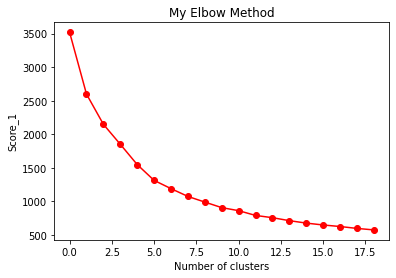

In [10]:
# Plot of k mean
plt.plot(score_1, 'ro-', label="Score_1")
plt.title("My Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("Score_1")
plt.show()

In [11]:
# applying k-means for k=3
kmeans = KMeans(n_clusters = 3, init = "k-means++", max_iter=300, n_init=10, random_state=0)
labels = kmeans.fit_predict(read_data_scaled)

In [12]:
labels

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 2, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 2, 0, 0, 1, 1, 0, 0, 1, 1, 2, 0, 1, 1, 0, 2, 0, 0, 1, 2,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 2, 2, 1,
       1, 1, 1, 1, 2, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 2, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,

In [13]:
import seaborn as sns

C:\Users\Yash Patel\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Region', ylabel='Fresh'>

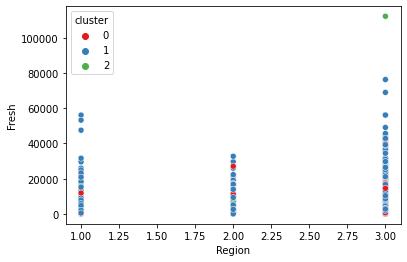

In [14]:
read_data["cluster"] = labels
sns.set_palette("Set2")
sns.scatterplot(read_data["Region"], read_data["Fresh"], hue=read_data["cluster"], palette="Set1")

In [15]:
data = read_data[["Fresh", "Milk",]]
data_df = pd.DataFrame(data)
data_df.columns = ["x", "y"]
data_df['true_cluster'] = labels
data_df.head()

,x,y,true_cluster
0,12669,9656,0
1,7057,9810,0
2,6353,8808,0
3,13265,1196,1
4,22615,5410,0


In [16]:
color_map = {0: 'red', 1: 'green', 2: 'blue'}
data_df['true_cluter'] = data_df.true_cluster.map(color_map)
data_df.head(n=3)

,x,y,true_cluster,true_cluter
0,12669,9656,0,red
1,7057,9810,0,red
2,6353,8808,0,red


Text(0, 0.5, 'Milk')

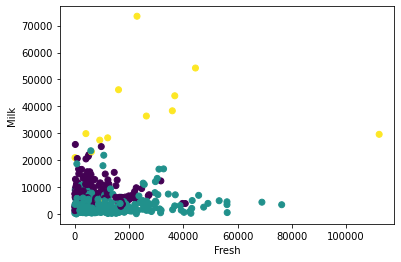

In [17]:
plt.scatter(x="x", y="y", c='true_cluster', data=data_df)
plt.xlabel("Fresh")
plt.ylabel("Milk")

Text(0, 0.5, 'y')

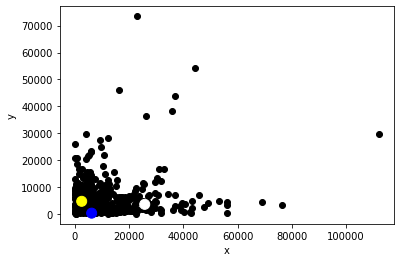

In [18]:
# first interation
current_centers = data_df.sample(3, random_state=1)
plt.scatter(x="x", y="y", c="black", data = data_df)
plt.scatter(x="x", y="y", data=current_centers, c=["white", "blue", "yellow"], s=100)
plt.xlabel("x")
plt.ylabel("y")

In [19]:
# distance
def dist(x, y):
    return sum((xi - yi) ** 2 for xi, yi in zip(x,y))

In [20]:
def assign_cluster_labels(data, centers):
    cluster_labels = []
    for point in data:
        distances = [dist(point, center) for center in centers]
        cluster_labels.append(distances.index(min(distances)))
    return cluster_labels

In [21]:
current_labels = assign_cluster_labels(data_df[['x', 'y']].values, current_centers[['x', 'y']].values)
current_labels[0:5]

[2, 2, 2, 1, 0]

In [22]:
# Second interation
current_centers = data_df[['x','y']].groupby(current_labels).mean()
print(current_centers)
current_labels = assign_cluster_labels(data_df[['x','y']].values, current_centers.values)

              x            y
0  27704.710744  6307.371901
1   9305.892857  2259.185714
2   3491.821229  8217.201117


Text(0, 0.5, 'y')

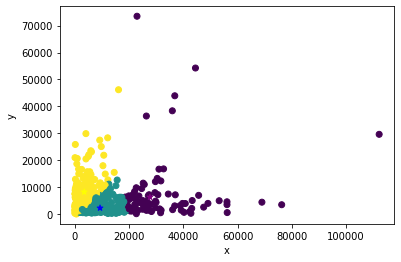

In [23]:
plt.scatter(x='x', y='y', c=current_labels, data=data_df)
plt.scatter(x='x', y='y', data=current_centers, c=['purple', 'blue', 'yellow'], marker="*")
plt.xlabel("x")
plt.ylabel("y")

              x            y
0  31313.644444  7241.300000
1  10422.983784  2676.918919
2   3234.248485  8505.515152


Text(0.5, 0, 'y')

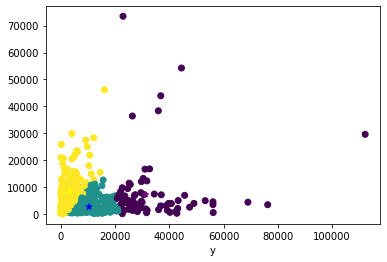

In [24]:
current_centers = data_df[['x','y']].groupby(current_labels).mean()
print(current_centers)
current_labels = assign_cluster_labels(data_df[['x','y']].values,
current_centers.values)
plt.scatter(x='x',y='y',c=current_labels,data=data_df)
plt.scatter(x='x',y='y',data=current_centers,c=['purple','blue','yellow'],marker='*')
plt.xlabel("x")
plt.xlabel("y")

              x            y
0  34352.605634  8415.746479
1  11720.329949  2856.959391
2   3094.133721  8081.500000


Text(0.5, 0, 'y')

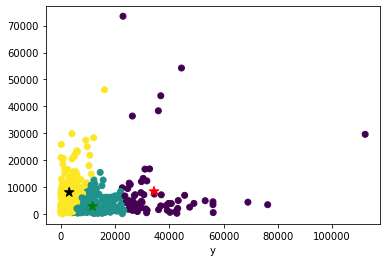

In [25]:
# Third iteration
current_centers = data_df[['x','y']].groupby(current_labels).mean()
print(current_centers)
current_labels = assign_cluster_labels(data_df[['x','y']].values,
current_centers.values)
plt.scatter(x='x',y='y',c=current_labels,data=data_df)
plt.scatter(x='x',y='y',data=current_centers,c=['red','green','black'],marker='*', s=100)
plt.xlabel("x")
plt.xlabel("y")

# Conclusion

Thus, in this practical we have performed K-Means Clustering on the Credit Card dataset using Elbow method (in-built libraries) and doing manually by iterating. Also, we have discovered that k=3 will be a good fit for this dataset.

Thank you